In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor()])
#      /transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [124]:

batch_size = 128

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

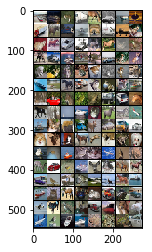

 ship  ship   cat truck


In [125]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

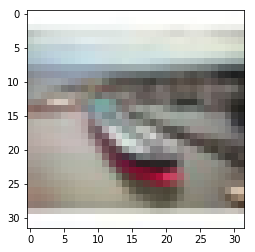

In [126]:
# width * height * channel
plt.imshow(images.transpose(1,2).transpose(2,3)[0])
plt.show()

In [147]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)        
        self.conv3 = nn.Conv2d(16, 32, 3)

        self.fc1 = nn.Linear(32*3*3, 64)
        self.fc2 = nn.Linear(64,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
#         print(x.shape)
        x = x.view(-1, 32 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

In [148]:
inputs.shape
32-(5-1)+2
15-(5-1)+2
n

NameError: name 'n' is not defined

In [149]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=288, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

In [150]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [155]:
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 116.233
[1,   200] loss: 115.448
[1,   300] loss: 115.812
[2,   100] loss: 115.639
[2,   200] loss: 117.063
[2,   300] loss: 113.828
[3,   100] loss: 114.899
[3,   200] loss: 115.888
[3,   300] loss: 114.716
[4,   100] loss: 113.003
[4,   200] loss: 112.901
[4,   300] loss: 114.869
[5,   100] loss: 114.188
[5,   200] loss: 113.509
[5,   300] loss: 111.757
[6,   100] loss: 111.579
[6,   200] loss: 113.575
[6,   300] loss: 112.557
[7,   100] loss: 111.545
[7,   200] loss: 111.903
[7,   300] loss: 113.421
[8,   100] loss: 111.133
[8,   200] loss: 114.111
[8,   300] loss: 109.506
[9,   100] loss: 110.219
[9,   200] loss: 111.491
[9,   300] loss: 109.730
[10,   100] loss: 109.458
[10,   200] loss: 109.911
[10,   300] loss: 109.225
[11,   100] loss: 108.571
[11,   200] loss: 108.623
[11,   300] loss: 110.851
[12,   100] loss: 108.857
[12,   200] loss: 110.012
[12,   300] loss: 108.677
[13,   100] loss: 107.461
[13,   200] loss: 110.092
[13,   300] loss: 106.882
[14,   100] l

In [156]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)                
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [157]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 67 %
Accuracy of  bird : 57 %
Accuracy of   cat : 38 %
Accuracy of  deer : 59 %
Accuracy of   dog : 48 %
Accuracy of  frog : 77 %
Accuracy of horse : 60 %
Accuracy of  ship : 78 %
Accuracy of truck : 61 %
